In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta 
import os
import datetime
import json
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbtpro as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from ma3 import get_data,Strategy
# plt.style.use('seaborn')

In [14]:
df_dict = {}
# candidate = ['1INCH','1000SHIB','AAVE','ADA','ALGO','ANKR','APE','APT','ARB','AVAX','BAND','BCH','BLUR','BNB','BTC','CYBER','DOGE','DYDX','EGLD','ENJ','ETC','ETH','FLOW','GALA','GMT','GMX','IMX','IOST','IOTA','LINK','LTC','MATIC','MANA','MKR','NEAR','NEO','OP','SNX','SEI','STX','SUSHI','THETA','TRB','XRP','XMR','XLM']
candidate = ['ADA','ETC','BTC','ETH','BCH','AAVE','AVAX','MATIC','XLM','MKR','APT','EGLD','GRT','ALGO']
for coin in candidate:
    df_dict[coin] = get_data(coin)

In [15]:
df_dict['SOL'] = get_data('SOL')

Start                               2022-01-01 00:00:00
End                                 2023-11-07 00:00:00
Period                                675 days 01:00:00
Start Value                                     10000.0
Min Value                                     9997.0009
Max Value                                  37620.655012
End Value                                  36010.514118
Total Return [%]                             260.105141
Benchmark Return [%]                         -75.533643
Total Time Exposure [%]                       29.146349
Max Gross Exposure [%]                            100.0
Max Drawdown [%]                              16.283105
Max Drawdown Duration                 121 days 15:00:00
Total Orders                                        160
Total Fees Paid                              493.800038
Total Trades                                         82
Win Rate [%]                                  42.682927
Best Trade [%]                                46

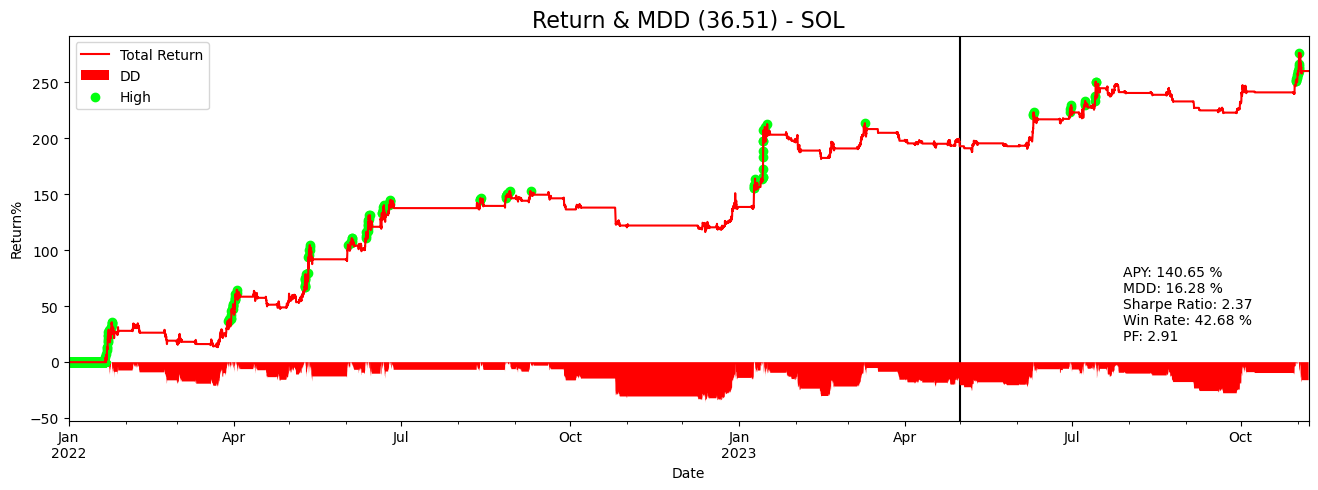

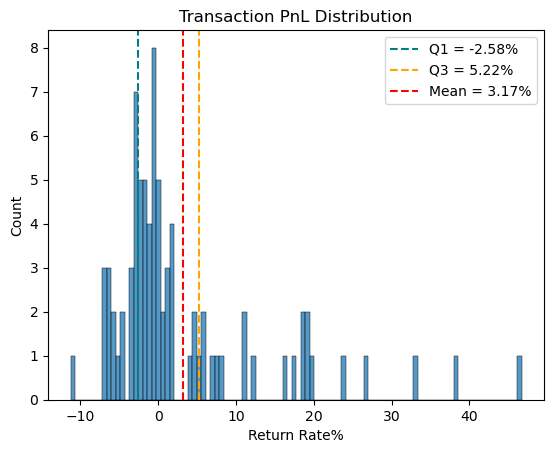

In [24]:
start = '2022-01-01'
sep = ''
end = ''

# params = {'short_window_l': 20, 'middle_window_l': 58, 'long_window_l': 120, 'short_window_s': 28, 'middle_window_s': 62, 'long_window_s': 120, 'upper_bound': 90}

params = {"short_window_l": 24.0,
        "middle_window_l": 56.0,
        "long_window_l": 140.0,
        "short_window_s": 24.0,
        "middle_window_s": 64.0,
        "long_window_s": 132.0,
        'upper_bound': 85}

side = 'both'
config = {'freq':'1h', 'lag':1, 'fee': 0.0003}
coin = 'SOL'
df = df_dict[coin]
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
# analyze.show_period_analysis(trades)
analyze.show_pf_analysis(params, side, coin, axv_index=['2023-05-01'])
analyze.plot_ret_dist(trades)

<AxesSubplot:xlabel='Entry Index'>

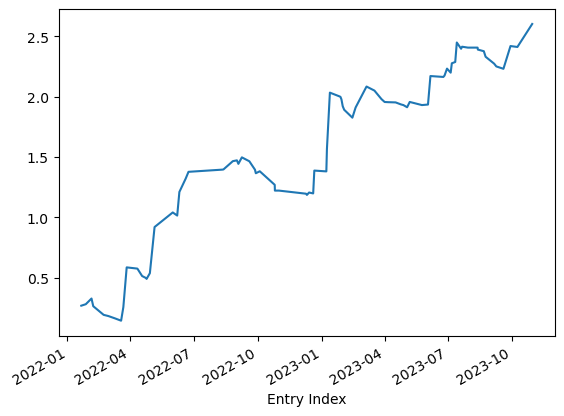

In [25]:
trades.index = trades['Entry Index']
trades['Return'].cumsum().plot()

======================= ETC BOTH Optimize Test =======================
Optimization trails: 5760


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:  2.3min finished


Optimization time: 138.69 sec
---------- ETC BOTH ----------
{'short_window_l': 28, 'middle_window_l': 50, 'long_window_l': 120, 'short_window_s': 36, 'middle_window_s': 74, 'long_window_s': 144, 'upper_bound': 85}
Start                               2022-01-01 00:00:00
End                                 2023-05-01 23:00:00
Period                                486 days 00:00:00
Start Value                                     10000.0
Min Value                                   9407.443646
Max Value                                  26313.195019
End Value                                  25700.702979
Total Return [%]                              157.00703
Benchmark Return [%]                         -44.522374
Total Time Exposure [%]                       24.794239
Max Gross Exposure [%]                       102.855389
Max Drawdown [%]                              12.009561
Max Drawdown Duration                 162 days 22:00:00
Total Orders                                         93
T

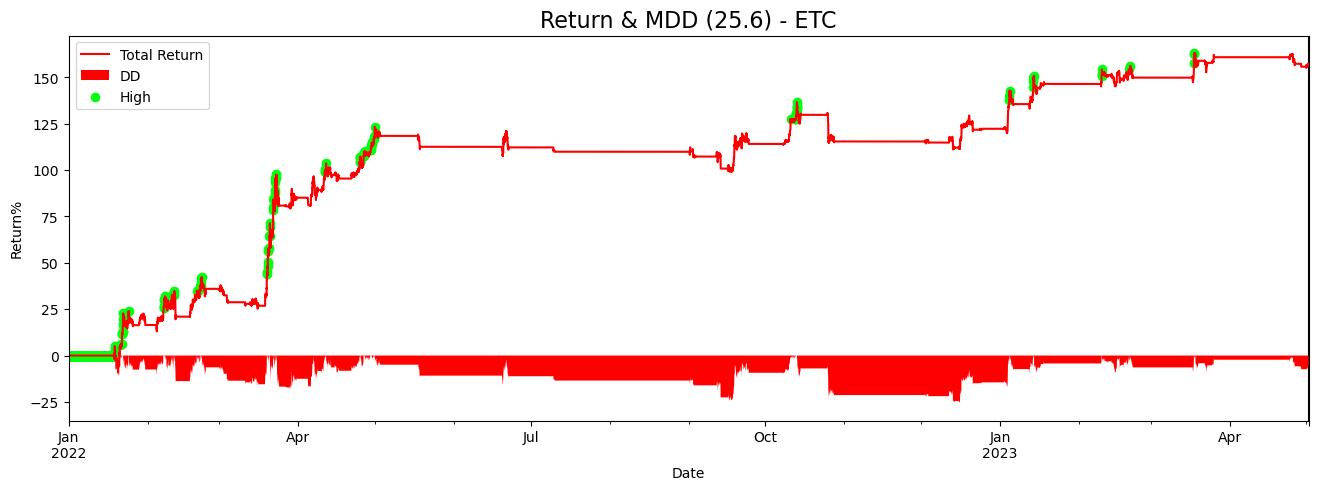

+------------+-----------+----------+----------+------------+---------+------------+
| datetime   |   收益率% |     毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+----------+----------+------------+---------+------------|
| 2022-03    |     86.12 | 10474.5  | -1963.12 |       5.34 |   42.86 |         14 |
| 2022-06    |     27.13 |  3924.95 | -1211.79 |       3.24 |   42.86 |          7 |
| 2022-09    |      1.88 |  1371.79 | -1184.25 |       1.16 |   50    |          6 |
| 2022-12    |      8.17 |  2658.25 | -1841.47 |       1.44 |   50    |          8 |
| 2023-03    |     38.6  |  4432.77 |  -573.08 |       7.73 |   81.82 |         11 |
| 2023-06    |     -3.88 |   123.88 |  -511.75 |       0.24 |   33.33 |          3 |
+------------+-----------+----------+----------+------------+---------+------------+
======================= BTC BOTH Optimize Test =======================
Optimization trails: 5760


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:   58.7s
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:  2.1min finished


Optimization time: 127.86 sec
---------- BTC BOTH ----------
{'short_window_l': 36, 'middle_window_l': 50, 'long_window_l': 120, 'short_window_s': 28, 'middle_window_s': 74, 'long_window_s': 136, 'upper_bound': 85}
Start                               2022-01-01 00:00:00
End                                 2023-05-01 23:00:00
Period                                486 days 00:00:00
Start Value                                     10000.0
Min Value                                   9816.826737
Max Value                                   19038.51716
End Value                                  18639.295766
Total Return [%]                              86.392958
Benchmark Return [%]                          -39.97492
Total Time Exposure [%]                       32.690329
Max Gross Exposure [%]                       103.670721
Max Drawdown [%]                               19.17984
Max Drawdown Duration                 263 days 21:00:00
Total Orders                                        149
T

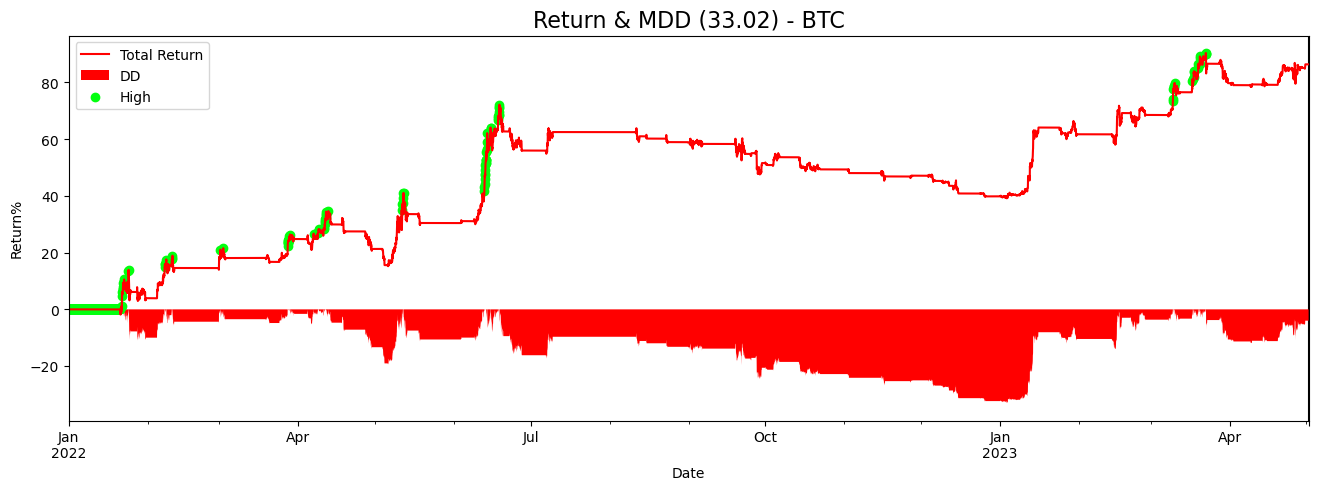

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |     24.8  | 2942.93 |  -462.76 |       6.36 |   66.67 |          9 |
| 2022-06    |     31.2  | 5863.85 | -2743.61 |       2.14 |   35.71 |         14 |
| 2022-09    |     -5.1  |  830.58 | -1340.94 |       0.62 |   35.71 |         14 |
| 2022-12    |    -11.07 |  302.32 | -1408.85 |       0.21 |   12.5  |         16 |
| 2023-03    |     39.94 | 5591.25 | -1597.64 |       3.5  |   55.56 |         18 |
| 2023-06    |      6.62 | 1131.4  |  -469.23 |       2.41 |   55.56 |          9 |
+------------+-----------+---------+----------+------------+---------+------------+
======================= ETH BOTH Optimize Test =======================
Optimization trails: 5760


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:   57.6s
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:  2.1min finished


Optimization time: 128.98 sec
---------- ETH BOTH ----------
{'short_window_l': 20, 'middle_window_l': 58, 'long_window_l': 144, 'short_window_s': 20, 'middle_window_s': 74, 'long_window_s': 136, 'upper_bound': 85}
Start                               2022-01-01 00:00:00
End                                 2023-05-01 23:00:00
Period                                486 days 00:00:00
Start Value                                     10000.0
Min Value                                     9997.0009
Max Value                                  17748.716312
End Value                                  15929.174369
Total Return [%]                              59.291744
Benchmark Return [%]                         -50.960456
Total Time Exposure [%]                       28.918038
Max Gross Exposure [%]                            100.0
Max Drawdown [%]                              16.905664
Max Drawdown Duration                 167 days 01:00:00
Total Orders                                        133
T

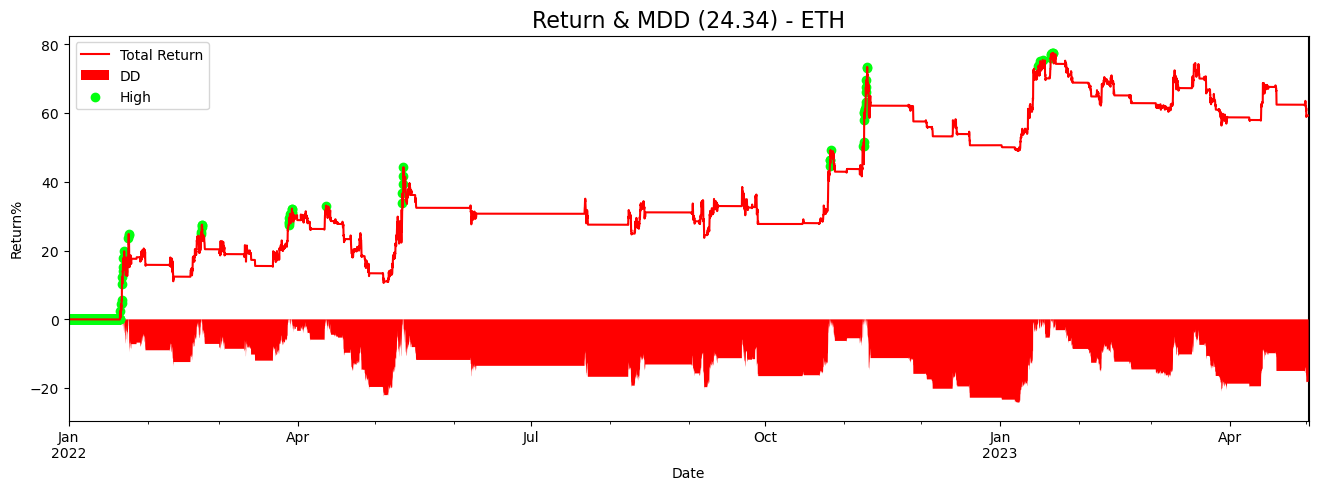

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |     28.89 | 4082.72 | -1194.55 |       3.42 |   53.85 |         13 |
| 2022-06    |      1.86 | 2744.22 | -2557.96 |       1.07 |   16.67 |         12 |
| 2022-09    |     -2.99 | 1670.98 | -1970.27 |       0.85 |   40    |         10 |
| 2022-12    |     22.89 | 3509.08 | -1219.97 |       2.88 |   55.56 |          9 |
| 2023-03    |      8.13 | 4030.48 | -3217.63 |       1.25 |   30    |         20 |
| 2023-06    |      0.52 |  962.24 |  -910.17 |       1.06 |   25    |          4 |
+------------+-----------+---------+----------+------------+---------+------------+
======================= BCH BOTH Optimize Test =======================
Optimization trails: 5760


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:  2.3min finished


Optimization time: 139.89 sec
---------- BCH BOTH ----------
{'short_window_l': 20, 'middle_window_l': 66, 'long_window_l': 136, 'short_window_s': 36, 'middle_window_s': 50, 'long_window_s': 144, 'upper_bound': 85}
Start                               2022-01-01 00:00:00
End                                 2023-05-01 23:00:00
Period                                486 days 00:00:00
Start Value                                     10000.0
Min Value                                   9679.276781
Max Value                                  24559.729332
End Value                                  23054.111248
Total Return [%]                             130.541112
Benchmark Return [%]                         -73.171854
Total Time Exposure [%]                       33.513374
Max Gross Exposure [%]                       106.565038
Max Drawdown [%]                              15.086021
Max Drawdown Duration                 276 days 14:00:00
Total Orders                                        165
T

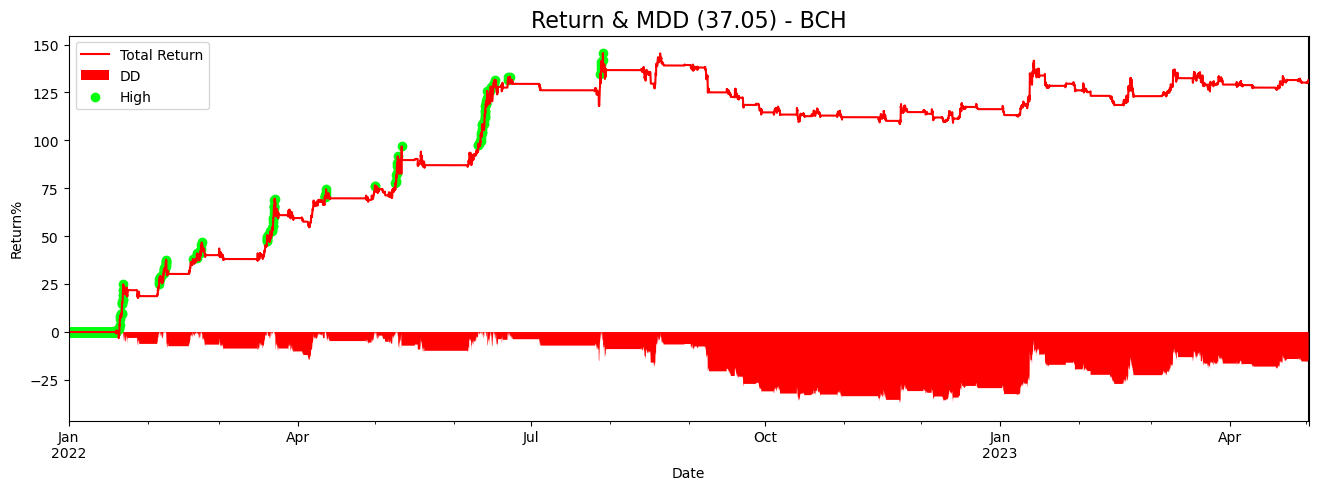

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |     59.49 | 6615.95 |  -667.39 |       9.91 |   57.14 |          7 |
| 2022-06    |     70.02 | 8218.21 | -1216.34 |       6.76 |   50    |         18 |
| 2022-09    |    -14.87 | 3121.79 | -4608.33 |       0.68 |   31.58 |         19 |
| 2022-12    |      1.68 | 1238.71 | -1070.91 |       1.16 |   28.57 |         14 |
| 2023-03    |     12.83 | 3641.96 | -2359.12 |       1.54 |   35    |         20 |
| 2023-06    |      1.4  |  513.34 |  -373.75 |       1.37 |   28.57 |          7 |
+------------+-----------+---------+----------+------------+---------+------------+
======================= AAVE BOTH Optimize Test =======================
Optimization trails: 5760


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   38.6s
/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  1.2min
/Users/johnsonhsiao/opt/anaconda3/lib/py

Optimization time: 156.04 sec
---------- AAVE BOTH ----------
{'short_window_l': 20, 'middle_window_l': 50, 'long_window_l': 120, 'short_window_s': 20, 'middle_window_s': 50, 'long_window_s': 144, 'upper_bound': 85}
Start                               2022-01-01 00:00:00
End                                 2023-05-01 23:00:00
Period                                486 days 00:00:00
Start Value                                     10000.0
Min Value                                   9238.438781
Max Value                                  29096.321544
End Value                                  27785.516954
Total Return [%]                              177.85517
Benchmark Return [%]                         -73.827321
Total Time Exposure [%]                       32.133059
Max Gross Exposure [%]                       107.124879
Max Drawdown [%]                              17.287285
Max Drawdown Duration                 237 days 17:00:00
Total Orders                                        149


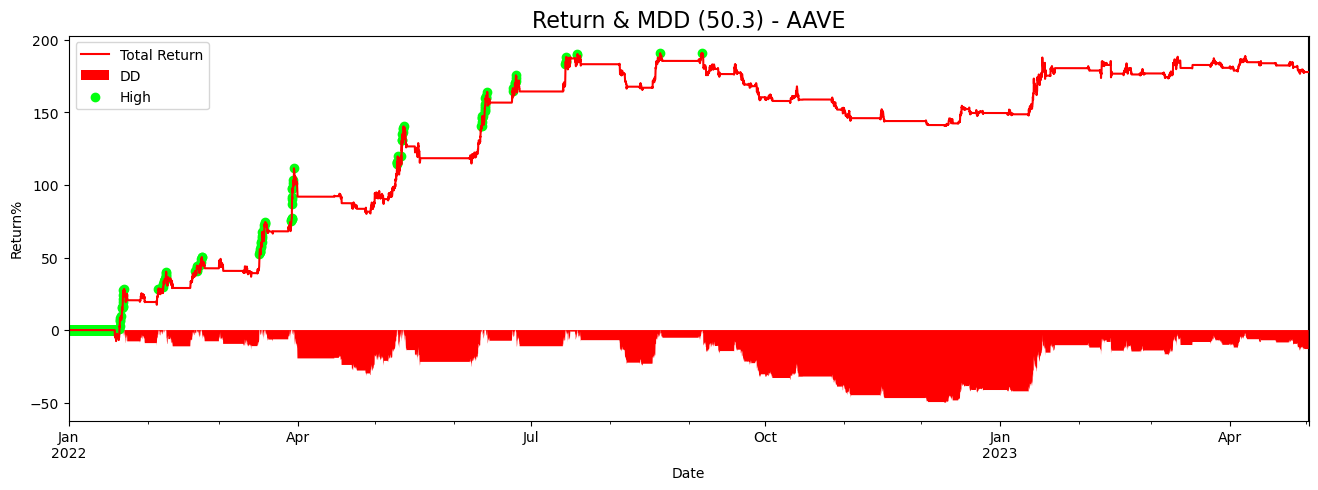

+------------+-----------+----------+----------+------------+---------+------------+
| datetime   |   收益率% |     毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+----------+----------+------------+---------+------------|
| 2022-03    |     93.07 | 10575.8  | -1380.61 |       7.66 |   50    |         12 |
| 2022-06    |     72.52 |  9404.51 | -2152.47 |       4.37 |   35.71 |         14 |
| 2022-09    |     -6.56 |  4561.42 | -5217.78 |       0.87 |   21.05 |         19 |
| 2022-12    |     -8.29 |  1203.5  | -2032.28 |       0.59 |   30.77 |         13 |
| 2023-03    |     29.3  |  4921.73 | -1991.27 |       2.47 |   50    |         16 |
| 2023-06    |     -1.07 |   572.22 |  -679.25 |       0.84 |   16.67 |          6 |
+------------+-----------+----------+----------+------------+---------+------------+
======================= AVAX BOTH Optimize Test =======================
Optimization trails: 5760


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:   13.8s
/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.war

Optimization time: 129.59 sec
---------- AVAX BOTH ----------
{'short_window_l': 20, 'middle_window_l': 74, 'long_window_l': 144, 'short_window_s': 36, 'middle_window_s': 50, 'long_window_s': 144, 'upper_bound': 85}
Start                               2022-01-01 00:00:00
End                                 2023-05-01 23:00:00
Period                                486 days 00:00:00
Start Value                                     10000.0
Min Value                                   9869.787435
Max Value                                  27649.744118
End Value                                  26355.608545
Total Return [%]                             163.556085
Benchmark Return [%]                         -85.140411
Total Time Exposure [%]                       29.278121
Max Gross Exposure [%]                       102.577836
Max Drawdown [%]                              16.608628
Max Drawdown Duration                  78 days 23:00:00
Total Orders                                        128


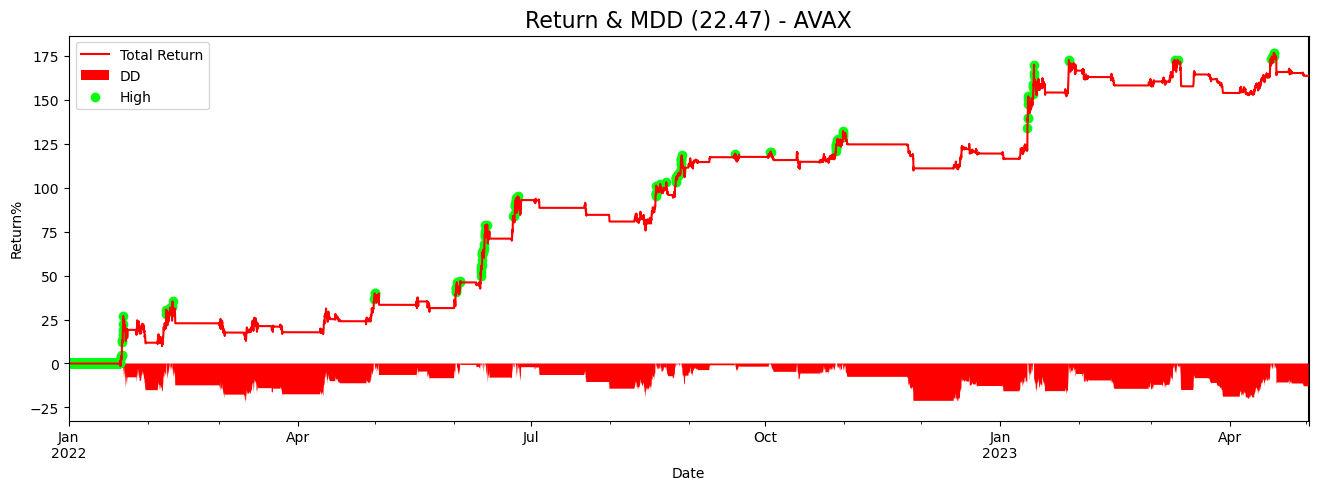

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |     17.78 | 3577.77 | -1800.02 |       1.99 |   50    |         10 |
| 2022-06    |     75.14 | 8122    |  -607.8  |      13.36 |   58.33 |         12 |
| 2022-09    |     24.54 | 4430.59 | -1977.09 |       2.24 |   38.46 |         13 |
| 2022-12    |      1.92 | 2132.51 | -1940.83 |       1.1  |   27.27 |         11 |
| 2023-03    |     34.43 | 7376.19 | -3932.82 |       1.88 |   40    |         15 |
| 2023-06    |      9.75 | 1231.94 |  -256.83 |       4.8  |   40    |          5 |
+------------+-----------+---------+----------+------------+---------+------------+
======================= MATIC BOTH Optimize Test =======================
Optimization trails: 5760


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:  2.1min finished


Optimization time: 125.28 sec
---------- MATIC BOTH ----------
{'short_window_l': 28, 'middle_window_l': 66, 'long_window_l': 120, 'short_window_s': 36, 'middle_window_s': 74, 'long_window_s': 144, 'upper_bound': 90}
Start                               2022-01-01 00:00:00
End                                 2023-05-01 23:00:00
Period                                486 days 00:00:00
Start Value                                     10000.0
Min Value                                     9997.0009
Max Value                                  30037.695604
End Value                                  28729.797602
Total Return [%]                             187.297976
Benchmark Return [%]                         -62.854039
Total Time Exposure [%]                       36.762689
Max Gross Exposure [%]                       105.087315
Max Drawdown [%]                               18.73086
Max Drawdown Duration                 109 days 04:00:00
Total Orders                                        120

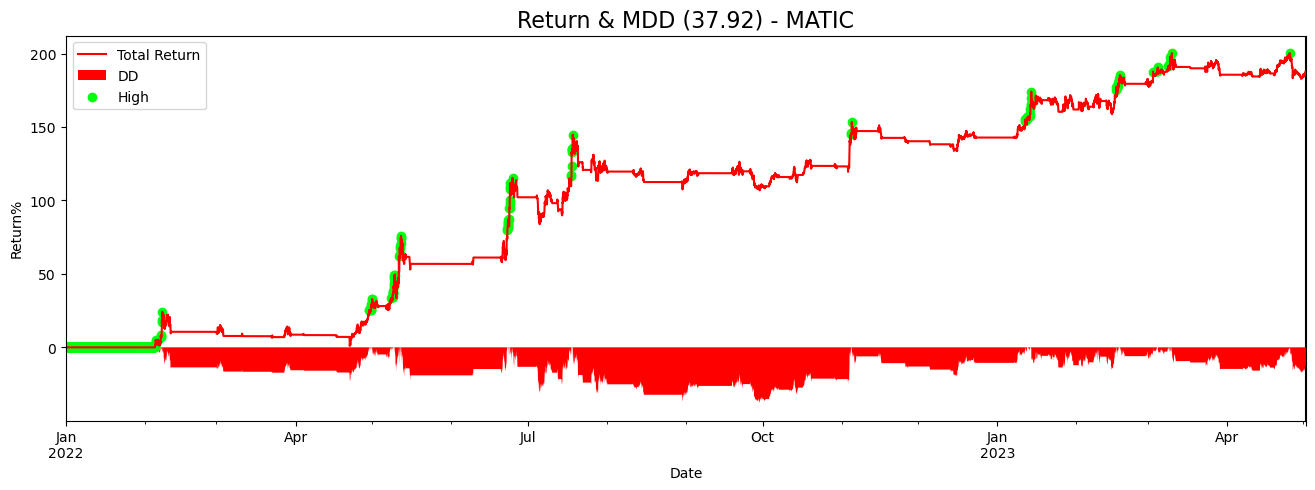

+------------+-----------+----------+----------+------------+---------+------------+
| datetime   |   收益率% |     毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+----------+----------+------------+---------+------------|
| 2022-03    |      8.64 |  1223.15 |  -359.74 |       3.4  |   40    |          5 |
| 2022-06    |     93.54 | 10712.7  | -1358.42 |       7.89 |   50    |          8 |
| 2022-09    |      7.44 |  5496.16 | -4752.3  |       1.16 |   37.5  |         16 |
| 2022-12    |     33.22 |  4826.5  | -1504.82 |       3.21 |   50    |         14 |
| 2023-03    |     42.78 |  6713.88 | -2435.78 |       2.76 |   56.25 |         16 |
| 2023-06    |      1.68 |   994.4  |  -825.93 |       1.2  |   42.86 |          7 |
+------------+-----------+----------+----------+------------+---------+------------+
======================= XLM BOTH Optimize Test =======================
Optimization trails: 5760


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:  2.2min finished


Optimization time: 133.89 sec
---------- XLM BOTH ----------
{'short_window_l': 36, 'middle_window_l': 66, 'long_window_l': 120, 'short_window_s': 20, 'middle_window_s': 62, 'long_window_s': 120, 'upper_bound': 90}
Start                               2022-01-01 00:00:00
End                                 2023-05-01 23:00:00
Period                                486 days 00:00:00
Start Value                                     10000.0
Min Value                                   9789.088447
Max Value                                  22108.825301
End Value                                  21209.500536
Total Return [%]                             112.095005
Benchmark Return [%]                         -65.762724
Total Time Exposure [%]                       33.659122
Max Gross Exposure [%]                            100.0
Max Drawdown [%]                              12.850276
Max Drawdown Duration                 221 days 09:00:00
Total Orders                                        130
T

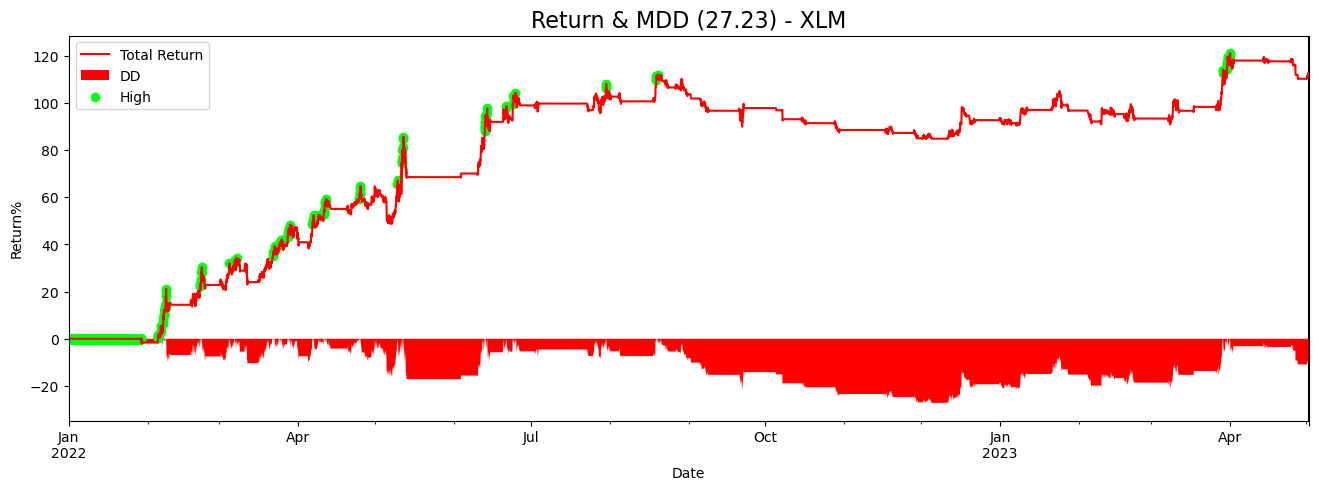

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |     41.18 | 5538.47 | -1447.14 |       3.83 |   60    |         10 |
| 2022-06    |     58    | 7190.02 | -1389.78 |       5.17 |   66.67 |         12 |
| 2022-09    |     -1.14 | 1645.53 | -1759.7  |       0.94 |   28.57 |         14 |
| 2022-12    |     -6.7  | 1035.2  | -1705.11 |       0.61 |   35.71 |         14 |
| 2023-03    |     26.85 | 3573.38 |  -888.74 |       4.02 |   53.85 |         13 |
| 2023-06    |     -5.83 |  190.39 |  -773.01 |       0.25 |   20    |          5 |
+------------+-----------+---------+----------+------------+---------+------------+
======================= MKR BOTH Optimize Test =======================
Optimization trails: 5760


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  1.1min
/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
[Parallel(n_jobs=-1)]: Done 3265 tasks  

Optimization time: 144.13 sec
---------- MKR BOTH ----------
{'short_window_l': 20, 'middle_window_l': 66, 'long_window_l': 144, 'short_window_s': 20, 'middle_window_s': 50, 'long_window_s': 144, 'upper_bound': 85}
Start                               2022-01-01 00:00:00
End                                 2023-05-01 23:00:00
Period                                486 days 00:00:00
Start Value                                     10000.0
Min Value                                   9929.294804
Max Value                                  24735.913574
End Value                                  21933.494696
Total Return [%]                             119.334947
Benchmark Return [%]                         -70.179763
Total Time Exposure [%]                       34.164952
Max Gross Exposure [%]                       116.333229
Max Drawdown [%]                               25.62931
Max Drawdown Duration                 173 days 08:00:00
Total Orders                                        139
T

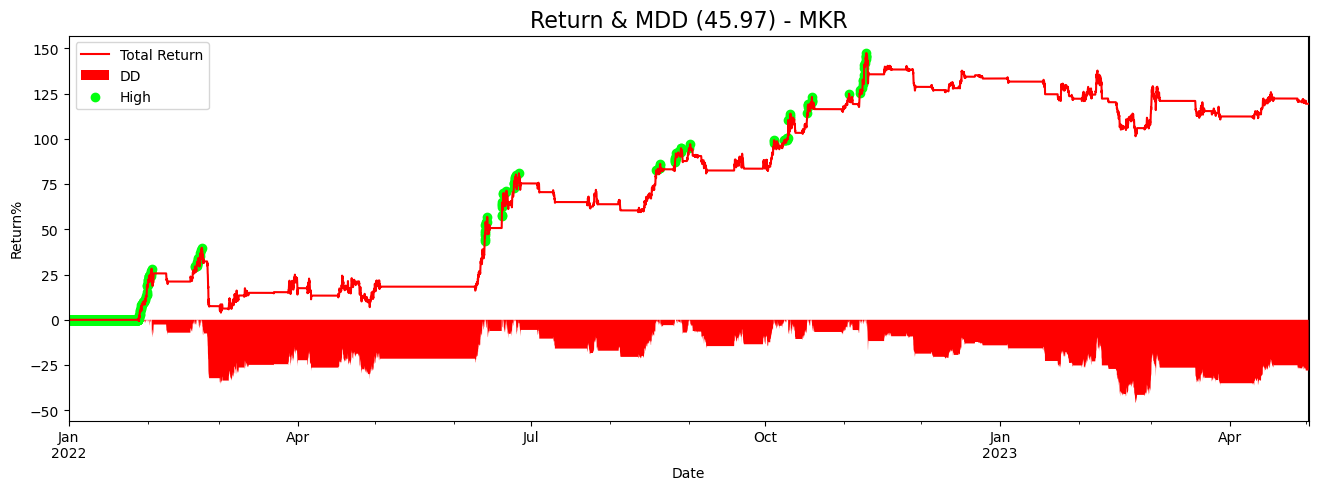

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |     17.48 | 4801.32 | -3054.31 |       1.57 |   66.67 |          9 |
| 2022-06    |     57.86 | 7373.46 | -1587.09 |       4.65 |   54.55 |         11 |
| 2022-09    |      9.27 | 3431.19 | -2504.25 |       1.37 |   46.67 |         15 |
| 2022-12    |     48.65 | 6237.08 | -1371.84 |       4.55 |   60    |         15 |
| 2023-03    |    -20.94 | 2378.2  | -4471.9  |       0.53 |   27.78 |         18 |
| 2023-06    |      7.02 |  992.07 |  -290.44 |       3.42 |   50    |          4 |
+------------+-----------+---------+----------+------------+---------+------------+
======================= APT BOTH Optimize Test =======================
Optimization trails: 5760


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 1869 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 2314 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done 2841 tasks      | elapsed:   59.9s
/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
[Parallel(n_jobs=-1)]: Done 3448 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4137 tasks

Optimization time: 137.87 sec
---------- APT BOTH ----------
{'short_window_l': 36, 'middle_window_l': 58, 'long_window_l': 144, 'short_window_s': 20, 'middle_window_s': 68, 'long_window_s': 144, 'upper_bound': 85}
Start                               2022-10-19 02:00:00
End                                 2023-05-01 23:00:00
Period                                194 days 22:00:00
Start Value                                     10000.0
Min Value                                     9997.0009
Max Value                                  29271.639366
End Value                                  26390.495154
Total Return [%]                             163.904952
Benchmark Return [%]                          37.200277
Total Time Exposure [%]                       32.920051
Max Gross Exposure [%]                            100.0
Max Drawdown [%]                               15.01968
Max Drawdown Duration                  65 days 03:00:00
Total Orders                                         54
T

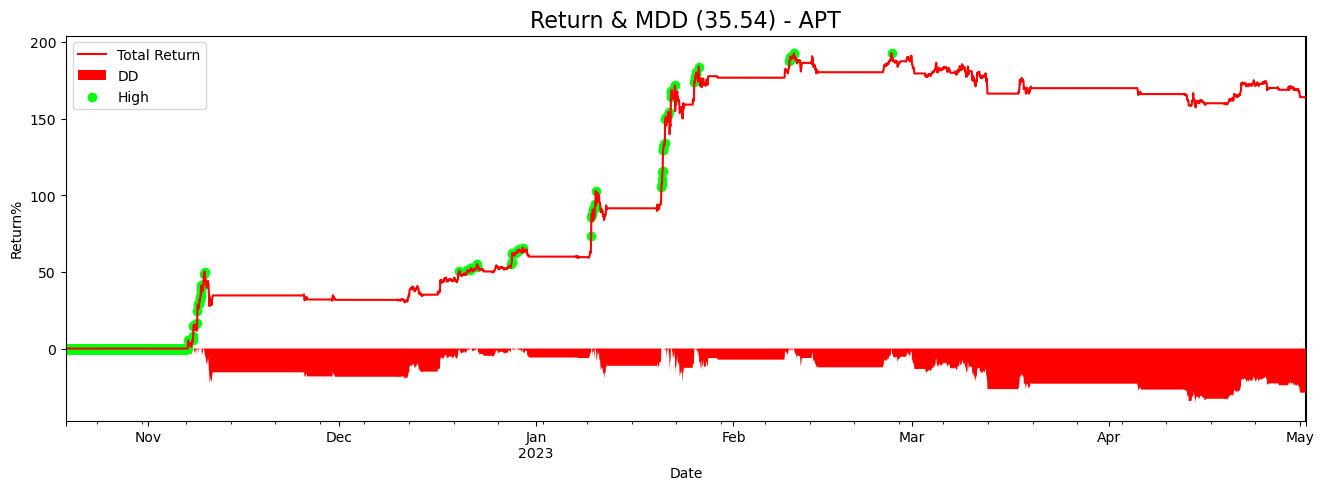

+------------+-----------+----------+----------+------------+---------+------------+
| datetime   |   收益率% |     毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+----------+----------+------------+---------+------------|
| 2022-12    |     59.95 |  6282.13 |  -288.27 |      21.79 |   66.67 |          6 |
| 2023-03    |    109.86 | 13976.1  | -2990.35 |       4.67 |   61.54 |         13 |
| 2023-06    |     -5.89 |  1421.4  | -2010.49 |       0.71 |   25    |          8 |
+------------+-----------+----------+----------+------------+---------+------------+
======================= EGLD BOTH Optimize Test =======================
Optimization trails: 5760


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 1978 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 2738 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3872 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4561 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 5330 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:  2.0min finished


Optimization time: 118.48 sec
---------- EGLD BOTH ----------
{'short_window_l': 20, 'middle_window_l': 58, 'long_window_l': 120, 'short_window_s': 28, 'middle_window_s': 62, 'long_window_s': 120, 'upper_bound': 90}
Start                         2022-01-01 00:00:00
End                           2023-05-01 23:00:00
Period                          486 days 00:00:00
Start Value                               10000.0
Min Value                             9607.358526
Max Value                            25149.268981
End Value                             23174.71281
Total Return [%]                       131.747128
Benchmark Return [%]                   -82.826248
Total Time Exposure [%]                 42.009602
Max Gross Exposure [%]                 108.111332
Max Drawdown [%]                        24.456984
Max Drawdown Duration           206 days 12:00:00
Total Orders                                  161
Total Fees Paid                        502.239239
Total Trades                      

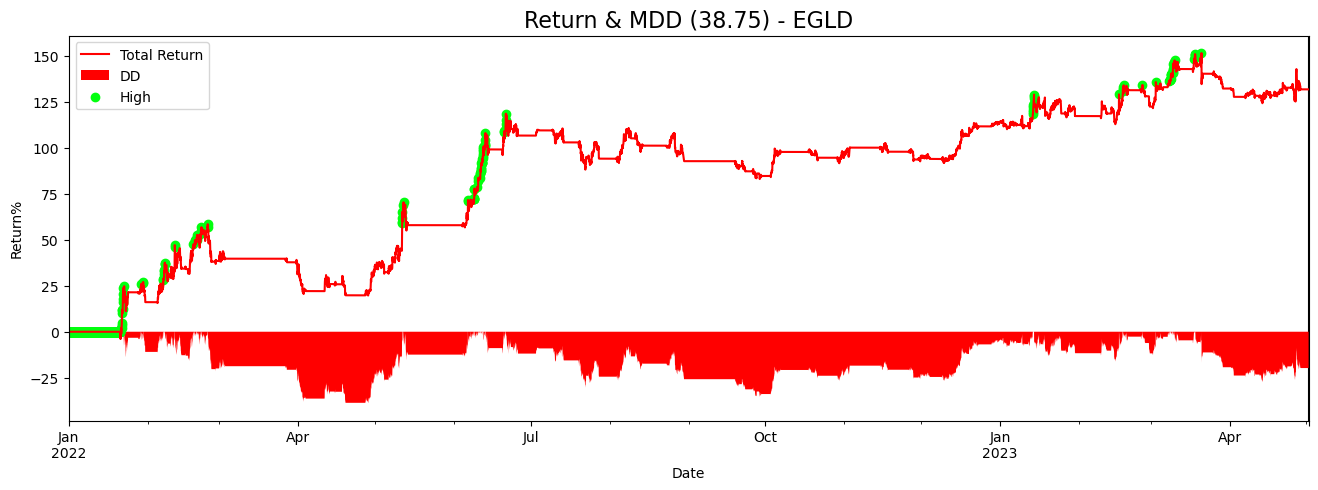

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |     25.87 | 6182.25 | -3595.44 |       1.72 |   46.15 |         13 |
| 2022-06    |     80.77 | 9421.5  | -1344.71 |       7.01 |   58.33 |         12 |
| 2022-09    |    -21.99 | 1460.14 | -3658.84 |       0.4  |   23.53 |         17 |
| 2022-12    |     27.52 | 3810.73 | -1058.63 |       3.6  |   50    |         12 |
| 2023-03    |     20.03 | 5673.63 | -3670.9  |       1.55 |   40    |         20 |
| 2023-06    |     -0.45 | 1508.98 | -1553.99 |       0.97 |   50    |         10 |
+------------+-----------+---------+----------+------------+---------+------------+
======================= GRT BOTH Optimize Test =======================
Optimization trails: 5760


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:   60.0s
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:  2.2min finished


Optimization time: 132.77 sec
---------- GRT BOTH ----------
{'short_window_l': 36, 'middle_window_l': 74, 'long_window_l': 144, 'short_window_s': 36, 'middle_window_s': 74, 'long_window_s': 144, 'upper_bound': 90}
Start                               2022-01-01 00:00:00
End                                 2023-05-01 23:00:00
Period                                486 days 00:00:00
Start Value                                     10000.0
Min Value                                   9736.951073
Max Value                                   42380.18398
End Value                                  33652.785428
Total Return [%]                             236.527854
Benchmark Return [%]                         -80.165879
Total Time Exposure [%]                        39.54904
Max Gross Exposure [%]                       105.341504
Max Drawdown [%]                              27.865985
Max Drawdown Duration                  83 days 03:00:00
Total Orders                                        103
T

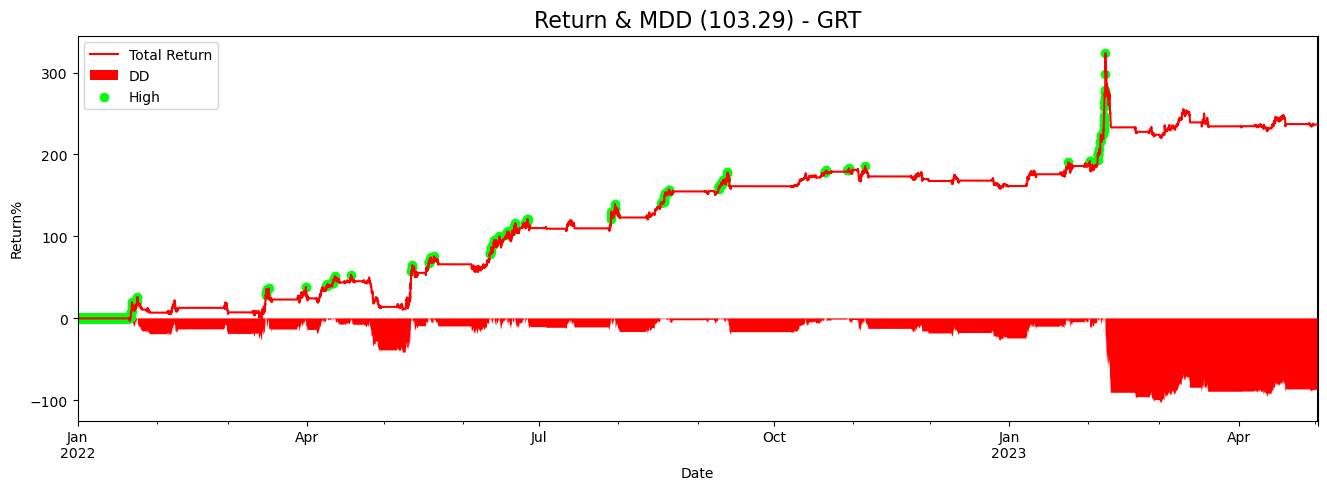

+------------+-----------+----------+----------+------------+---------+------------+
| datetime   |   收益率% |     毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+----------+----------+------------+---------+------------|
| 2022-03    |     24.39 |  3828.35 | -1390.05 |       2.75 |   57.14 |          7 |
| 2022-06    |     85.86 | 12821.8  | -4236.19 |       3.03 |   57.14 |         14 |
| 2022-09    |     51    |  5336.5  |  -236.09 |      22.6  |   77.78 |          9 |
| 2022-12    |      0.27 |  2650.39 | -2622.95 |       1.01 |   50    |         12 |
| 2023-03    |     72.75 |  9173.39 | -1898.58 |       4.83 |   55.56 |          9 |
| 2023-06    |      2.26 |   575.94 |  -349.67 |       1.65 |   60    |          5 |
+------------+-----------+----------+----------+------------+---------+------------+
======================= ALGO BOTH Optimize Test =======================
Optimization trails: 5760


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:   43.2s
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  1.3min
/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, Nu

Optimization time: 140.29 sec
---------- ALGO BOTH ----------
{'short_window_l': 20, 'middle_window_l': 58, 'long_window_l': 144, 'short_window_s': 36, 'middle_window_s': 74, 'long_window_s': 128, 'upper_bound': 90}
Start                               2022-01-01 00:00:00
End                                 2023-05-01 23:00:00
Period                                486 days 00:00:00
Start Value                                     10000.0
Min Value                                   9276.760783
Max Value                                  22794.553041
End Value                                  21818.648244
Total Return [%]                             118.186482
Benchmark Return [%]                         -89.569536
Total Time Exposure [%]                       27.846365
Max Gross Exposure [%]                       104.291845
Max Drawdown [%]                              16.965931
Max Drawdown Duration                 119 days 22:00:00
Total Orders                                         87


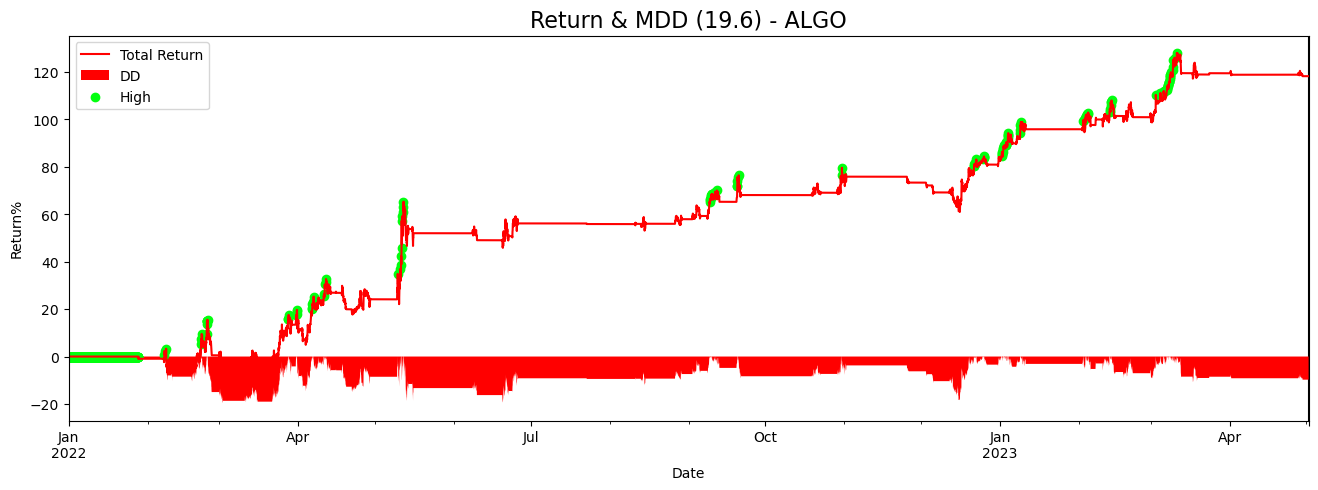

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |     12.24 | 2265.42 | -1128.17 |       2.01 |   25    |          8 |
| 2022-06    |     44.75 | 6051.66 | -1576.87 |       3.84 |   50    |         10 |
| 2022-09    |     11.95 | 1221.93 |   -26.53 |      46.05 |   85.71 |          7 |
| 2022-12    |     21.81 | 3637.54 | -1456.48 |       2.5  |   44.44 |          9 |
| 2023-03    |     29.55 | 3060.98 |  -105.78 |      28.94 |   75    |          8 |
| 2023-06    |     -1.25 |    0    |  -125.05 |       0    |    0    |          2 |
+------------+-----------+---------+----------+------------+---------+------------+
{'ETC': {'both': {0: {'short_window_l': 28, 'middle_window_l': 50, 'long_window_l': 120, 'short_window_s': 36, 'middle_window_s': 74, 'long_window_s': 144, 'upper_bound': 85}}},

In [5]:
import warnings
warnings.filterwarnings("ignore")

start= '2022-01-01'
end ='2023-05-01'

params={"short_window_l": [20,40,8],
        "middle_window_l": [50,80,8],
        "long_window_l": [120,150,8],
        "short_window_s": [20,40,8],
        "middle_window_s": [50,80,6],
        "long_window_s": [120,150,8],
        'upper_bound':[85,95,5]
    }
    
config = {'freq':'1h','fee': 0.0003}
# symbol_list = ['1INCH','1000SHIB','AAVE','ADA','ALGO','ANKR','APE','APT','ARB','AVAX','BAND','BCH','BLUR','BNB','BTC','CYBER','DOGE','DYDX','EGLD','ENJ','ETC','ETH','FLOW','GALA','GMT','GMX','IMX','IOST','IOTA','LINK','LTC','MATIC','MANA','MKR','NEAR','NEO','OP','SNX','SEI','STX','SUSHI','THETA','TRB','XRP','XMR','XLM']
symbol_list = ['SOL']
sample_sets = [[start,end]]

multi_test = MultiTester(
    Strategy,
    get_data_func=get_data,
    params=params,
    config=config,
    symbol_list=symbol_list,
    start=start,
    end=end
    )

all_params = multi_test.multi_params(symbol_list,sample_sets,direction='both')
# trades, value_df = multi_test.multi_params_result(all_params)
# multi_test.save_version_result(all_params,value_df,trades,1)
# all_params
